# Lista de exercícios 11

In [30]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

import sklearn
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn import linear_model as lm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from mylibs import transform
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

## Complemente a Lista de Exercícios 7 para também avaliar o desempenho dos algoritmos DecisionTree, RandomForest e Gradient Boosting tanto no problema de regressão (DecisionTreeRegressor,  RandomForestRegressor e GradientBoostingRegressor), como também no problema de classificação (DecisionTreeClassifier, RandomForestClassifier e GradientBoostingClassifier).

### Datasets

In [7]:
X,y = load_boston(return_X_y=True)

## Regressão

### Separando dados e label

In [38]:
# Aplicando Stardização apenas no X
X = transform.standardization(X)
#Aplicando K-fold para dividir os dados
kfold = KFold(n_splits=5)

#### Use um valor constante para o parâmetro random_state e teste os resultados com as seguintes combinações de hiper-parâmetros para RandomForest e Gradient Boosting:
- learning_rate: 0.1, 0.05, 0.01 (somente para o Gradient Boosting)
- n_estimators: 50, 100, 200
- max_depth: 3, 5, 7 

#### Mostre a importância das features de acordo com o melhor modelo de classificação e o melhor modelo de regressão encontrados dentre os 3 usados nesta lista de exercícios (DecisionTree, RandomForest e Gradient Boosting).

## Model Random Forest Regressor

In [21]:
n_estimators = 50
while n_estimators <= 200:
    max_depth = 3
    while max_depth <= 7:
        
        erros_mse_randomF = np.empty((1,0),dtype = float)
        erros_mae_randomF = np.empty((1,0),dtype = float)

        for train_index,test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            modelo_RFR = RandomForestRegressor(n_estimators=n_estimators,random_state=0,max_depth=max_depth)
            modelo_RFR.fit(X_train,y_train)
            ŷ = modelo_RFR.predict(X_test)
            erro_mse_randomF = np.sqrt(metrics.mean_squared_error(y_test, ŷ))
            erro_mae_randomF = metrics.mean_absolute_error(y_test, ŷ)
           
            erros_mse_randomF = np.append(erros_mse_randomF, erro_mse_randomF)
            erros_mae_randomF = np.append(erros_mae_randomF, erro_mae_randomF)


        print("N_estimators = {}".format(n_estimators) + " e max_depth = {}".format(max_depth))
        print("Erro MSE: {}".format(np.mean(erros_mse_randomF)))
        print("Erro MAE: {}".format(np.mean(erros_mae_randomF)))
        print("--------------------------------------------------------")
        max_depth = max_depth + 2
        
    n_estimators = n_estimators * 2

N_estimators = 50 e max_depth = 3
Erro MSE: 4.939470308337301
Erro MAE: 3.4980499475350775
--------------------------------------------------------
N_estimators = 50 e max_depth = 5
Erro MSE: 4.658906876804787
Erro MAE: 3.170800647565499
--------------------------------------------------------
N_estimators = 50 e max_depth = 7
Erro MSE: 4.560030916750247
Erro MAE: 3.060189942478459
--------------------------------------------------------
N_estimators = 100 e max_depth = 3
Erro MSE: 4.848333979791277
Erro MAE: 3.4461299024048295
--------------------------------------------------------
N_estimators = 100 e max_depth = 5
Erro MSE: 4.547700501398064
Erro MAE: 3.1187912029145117
--------------------------------------------------------
N_estimators = 100 e max_depth = 7
Erro MSE: 4.482635612069852
Erro MAE: 3.0387592768438765
--------------------------------------------------------
N_estimators = 200 e max_depth = 3
Erro MSE: 4.8561956424520805
Erro MAE: 3.4388920717004496
------------------

## Model Decision Tree Regressor

In [24]:
max_depth = 3

erros_mse_tree_decision = np.empty((1,0),dtype = float)
erros_mae_tree_decision = np.empty((1,0),dtype = float)

for train_index,test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    modelo_DTR = DecisionTreeRegressor(random_state=0)
    modelo_DTR.fit(X_train,y_train)
    ŷ = modelo_DTR.predict(X_test)
    erro_mse_tree_decision = np.sqrt(metrics.mean_squared_error(y_test, ŷ))
    erro_mae_tree_decision = metrics.mean_absolute_error(y_test, ŷ)

    erros_mse_tree_decision = np.append(erros_mse_tree_decision, erro_mse_tree_decision)
    erros_mae_tree_decision = np.append(erros_mae_tree_decision, erro_mae_tree_decision)

print("Erro MSE: {}".format(np.mean(erros_mse_tree_decision)))
print("Erro MAE: {}".format(np.mean(erros_mae_tree_decision)))

Erro MSE: 6.243197499249364
Erro MAE: 4.029419530188312


## Model Gradient boosting Regressor

In [39]:
learning_rate = 0.1
n_estimators = 50

for i in range(3):
    if(i == 1):
        learning_rate = 0.05
    elif i==2:
        learning_rate = 0.01
    
    n_estimators = 50    
    
    while n_estimators <= 200:
        max_depth = 3
        while max_depth <= 7:

            erros_mse_gradient_boosting = np.empty((1,0),dtype = float)
            erros_mae_gradient_boosting = np.empty((1,0),dtype = float)

            for train_index,test_index in kfold.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                modelo_GBR = GradientBoostingRegressor(n_estimators=n_estimators, random_state=0, max_depth=max_depth, learning_rate=learning_rate)
                modelo_GBR.fit(X_train,y_train)
                ŷ = modelo_GBR.predict(X_test)
                erro_mse_gradient_boosting = np.sqrt(metrics.mean_squared_error(y_test, ŷ))
                erro_mae_gradient_boosting = metrics.mean_absolute_error(y_test, ŷ)

                erros_mse = np.append(erros_mse_gradient_boosting, erro_mse_gradient_boosting)
                erros_mae = np.append(erros_mae_gradient_boosting, erro_mae_gradient_boosting)


            print("N_estimators = {}".format(n_estimators) + " e max_depth = {}".format(max_depth) + " e learning_rate = {}".format(learning_rate))
            print("Erro MSE: {}".format(np.mean(erros_mse)))
            print("Erro MAE: {}".format(np.mean(erros_mae)))
            print("--------------------------------------------------------")
            
            max_depth = max_depth + 2

        n_estimators = n_estimators * 2

N_estimators = 50 e max_depth = 3 e learning_rate = 0.1
Erro MSE: 0.202543755824367
Erro MAE: 0.0864937473030247
--------------------------------------------------------
N_estimators = 50 e max_depth = 5 e learning_rate = 0.1
Erro MSE: 0.21506437024642752
Erro MAE: 0.07401637527480191
--------------------------------------------------------
N_estimators = 50 e max_depth = 7 e learning_rate = 0.1
Erro MSE: 0.2336578874905724
Erro MAE: 0.07756840729463503
--------------------------------------------------------
N_estimators = 100 e max_depth = 3 e learning_rate = 0.1
Erro MSE: 0.20237233982904557
Erro MAE: 0.0875303322970841
--------------------------------------------------------
N_estimators = 100 e max_depth = 5 e learning_rate = 0.1
Erro MSE: 0.21478222581978063
Erro MAE: 0.0724064932184266
--------------------------------------------------------
N_estimators = 100 e max_depth = 7 e learning_rate = 0.1
Erro MSE: 0.23378036609215447
Erro MAE: 0.07575918647837626
----------------------

## Classificação

In [40]:
X,y = load_breast_cancer(return_X_y=True)

# Aplicando Normalização apenas no X
X = normalize(X)

kfold = StratifiedKFold(n_splits=5)

### Gerar curva roc

In [41]:
def gerar_curva_roc(y_test, X_test, algoritmo):
    fpr, tpr, _ = metrics.roc_curve(y_test, algoritmo.predict_proba(X_test)[:,1])
    roc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Model Random Forest Classifier

N_estimators = 50 e max_depth = 3
Recall = 0.9775821596244132
Acurácias = 0.9404078491727587
Precisions = 0.9323697879910329
F1 - score = 0.9540022736574076


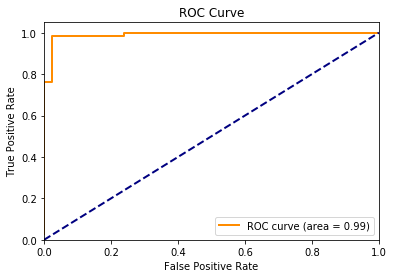

[[41  1]
 [ 2 69]]
--------------------------------------------------------
N_estimators = 50 e max_depth = 5
Recall = 0.9831768388106417
Acurácias = 0.9631704501731434
Precisions = 0.9594704685696491
F1 - score = 0.9710645252898775


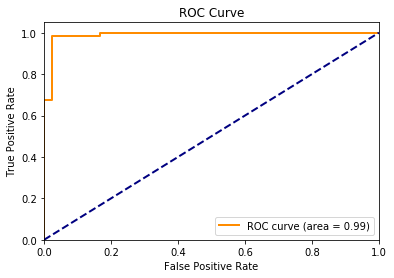

[[41  1]
 [ 1 70]]
--------------------------------------------------------
N_estimators = 50 e max_depth = 7
Recall = 0.980399061032864
Acurácias = 0.9579222777991536
Precisions = 0.9542870676818197
F1 - score = 0.9669793636291937


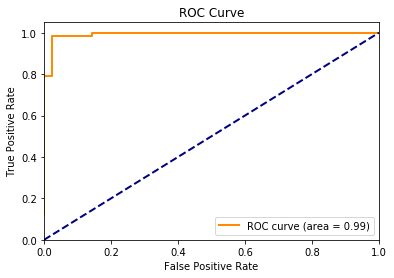

[[41  1]
 [ 1 70]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 3
Recall = 0.9831768388106417
Acurácias = 0.9421777606771835
Precisions = 0.9302057156935206
F1 - score = 0.9555244608292324


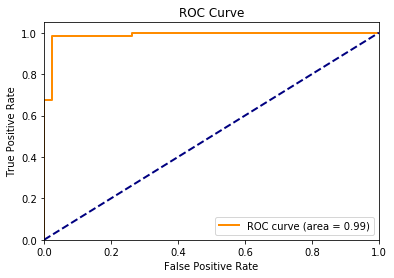

[[40  2]
 [ 1 70]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 5
Recall = 0.9831768388106417
Acurácias = 0.9579222777991536
Precisions = 0.9519126384580755
F1 - score = 0.9671107265191772


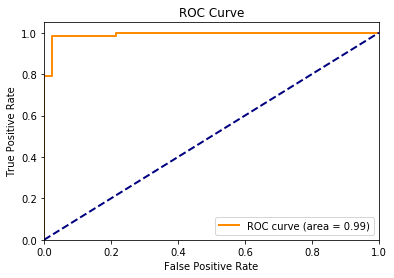

[[41  1]
 [ 1 70]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 7
Recall = 0.9831768388106417
Acurácias = 0.9631704501731434
Precisions = 0.9595322938946322
F1 - score = 0.9710631527409275


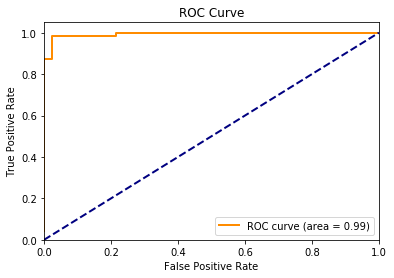

[[41  1]
 [ 1 70]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 3
Recall = 0.980399061032864
Acurácias = 0.9404078491727589
Precisions = 0.9295302752885066
F1 - score = 0.9540246636088421


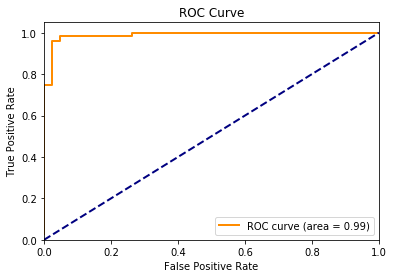

[[39  3]
 [ 1 70]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 5
Recall = 0.980399061032864
Acurácias = 0.9579530588687956
Precisions = 0.9544319887943272
F1 - score = 0.9670348361095034


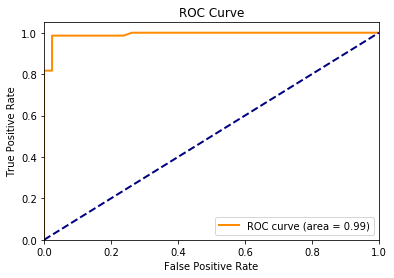

[[41  1]
 [ 1 70]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 7
Recall = 0.9832159624413146
Acurácias = 0.9632012312427858
Precisions = 0.9593685356508146
F1 - score = 0.9710674293251952


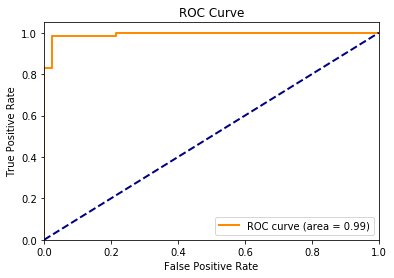

[[41  1]
 [ 1 70]]
--------------------------------------------------------


In [43]:
n_estimators = 50
while n_estimators <= 200:
    
    max_depth = 3
    while max_depth <= 7:
    
        model_RFC = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)
        
        recalls = np.empty((1,0),dtype = float)
        acuracias = np.empty((1,0),dtype = float)
        precisions = np.empty((1,0),dtype = float)
        f1s = np.empty((1,0),dtype = float)
        #aucs = np.empty((1,0),dtype = float)
        #fprs = np.empty((1,0),dtype = float)
        #tprs = np.empty((1,0),dtype = float)
        
        for train_index,test_index in kfold.split(X,y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
            model_RFC.fit(X_train, y_train)
            ŷ = model_RFC.predict(X_test)
           
            acuracia = metrics.accuracy_score(y_test, ŷ)
            precision = metrics.precision_score(y_test, ŷ)
            recall = metrics.recall_score(y_test, ŷ)
            f1 = metrics.f1_score(y_test, ŷ)
            
            recalls = np.append(recalls, recall)
            acuracias = np.append(acuracias, acuracia)
            precisions = np.append(precisions, precision)
            f1s = np.append(f1s, f1)    
            
        print("N_estimators = {}".format(n_estimators) + " e max_depth = {}".format(max_depth))
        print("Recall = {}".format(np.mean(recalls)))
        print("Acurácias = {}".format(np.mean(acuracias)))
        print("Precisions = {}".format(np.mean(precisions)))
        print("F1 - score = {}".format(np.mean(f1s)))
        
        gerar_curva_roc(y_test, X_test, model_RFC)
        
        print(metrics.confusion_matrix(y_test, ŷ, labels=np.unique(y_test)))
        
        
        print("--------------------------------------------------------")
        max_depth = max_depth + 2
    n_estimators = n_estimators*2

## Model Decision tree Classifier

Recall = 0.9383802816901408
Acurácias = 0.922708734128511
Precisions = 0.9385994579081929
F1 - score = 0.9384334269691239


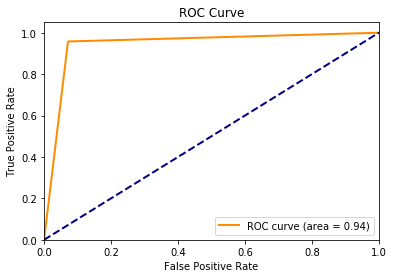

[[39  3]
 [ 3 68]]
--------------------------------------------------------


In [63]:
model_DTC = DecisionTreeClassifier()

recalls = np.empty((1,0),dtype = float)
acuracias = np.empty((1,0),dtype = float)
precisions = np.empty((1,0),dtype = float)
f1s = np.empty((1,0),dtype = float)

for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model_DTC.fit(X_train, y_train)
    ŷ = model_DTC.predict(X_test)
    
    acuracia = metrics.accuracy_score(y_test, ŷ)
    precision = metrics.precision_score(y_test, ŷ)
    recall = metrics.recall_score(y_test, ŷ)
    f1 = metrics.f1_score(y_test, ŷ)
    
    recalls = np.append(recalls,recall)
    acuracias = np.append(acuracias, acuracia)
    precisions = np.append(precisions, precision)
    f1s = np.append(f1s, f1)
    

print("Recall = {}".format(np.mean(recalls)))
print("Acurácias = {}".format(np.mean(acuracias)))
print("Precisions = {}".format(np.mean(precisions)))
print("F1 - score = {}".format(np.mean(f1s)))
  
gerar_curva_roc(y_test, X_test, model_DTC)

print(metrics.confusion_matrix(y_test, ŷ, labels=np.unique(y_test)))
print("--------------------------------------------------------")

## Model Gradient Boosting Classifier

N_estimators = 50 e max_depth = 3 e learning_rate = 0.1
Recall = 0.9719874804381847
Acurácias = 0.9561523662947288
Precisions = 0.9590957615400424
F1 - score = 0.9653336225750019


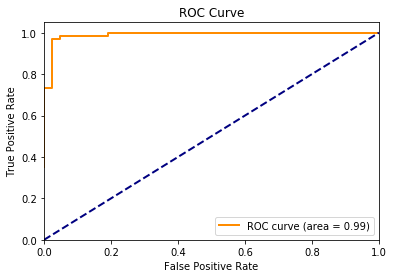

[[41  1]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 50 e max_depth = 5 e learning_rate = 0.1
Recall = 0.9608763693270734
Acurácias = 0.9438553289726819
Precisions = 0.9501786418871119
F1 - score = 0.9554171520562973


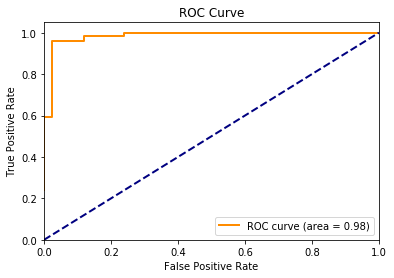

[[39  3]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 50 e max_depth = 7 e learning_rate = 0.1
Recall = 0.9327464788732394
Acurácias = 0.9262177760677183
Precisions = 0.9490850762963262
F1 - score = 0.9406438884496978


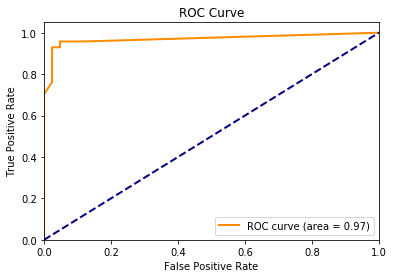

[[38  4]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 3 e learning_rate = 0.1
Recall = 0.9775821596244132
Acurácias = 0.9614005386687188
Precisions = 0.9619496428185812
F1 - score = 0.9695296947021085


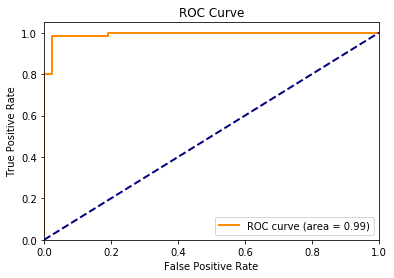

[[41  1]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 5 e learning_rate = 0.1
Recall = 0.9636932707355242
Acurácias = 0.9491650634859562
Precisions = 0.9555480523935087
F1 - score = 0.9595553510220824


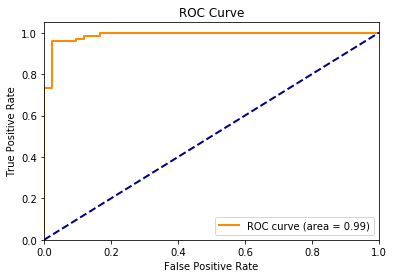

[[39  3]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 7 e learning_rate = 0.1
Recall = 0.9327856025039123
Acurácias = 0.9333282031550596
Precisions = 0.9602551952368241
F1 - score = 0.9460953654883568


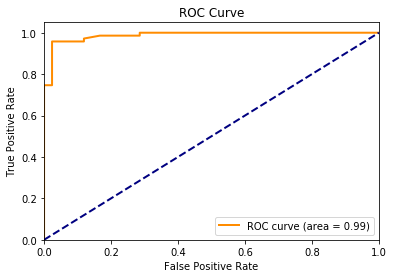

[[40  2]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 3 e learning_rate = 0.1
Recall = 0.9803599374021909
Acurácias = 0.9631396691035012
Precisions = 0.9621205245684102
F1 - score = 0.9709263934142435


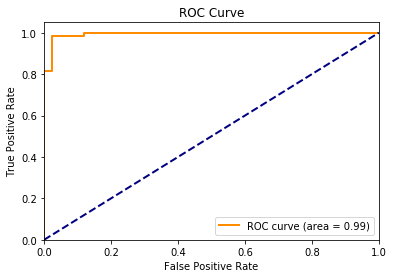

[[41  1]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 5 e learning_rate = 0.1
Recall = 0.9608763693270734
Acurácias = 0.9491650634859561
Precisions = 0.9582062236432292
F1 - score = 0.9594758580447771


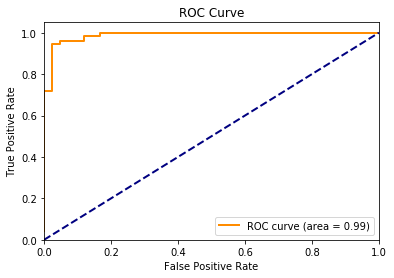

[[40  2]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 7 e learning_rate = 0.1
Recall = 0.9327856025039123
Acurácias = 0.9315582916506349
Precisions = 0.9572767175681147
F1 - score = 0.9447653545975443


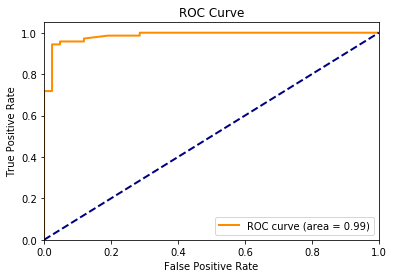

[[40  2]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 50 e max_depth = 3 e learning_rate = 0.05
Recall = 0.9719874804381847
Acurácias = 0.9509349749903808
Precisions = 0.951628144802058
F1 - score = 0.961456031983357


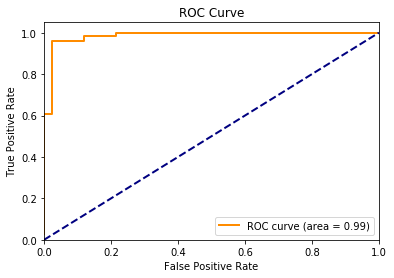

[[41  1]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 50 e max_depth = 5 e learning_rate = 0.05
Recall = 0.9524256651017214
Acurácias = 0.936837245094267
Precisions = 0.9473769282360832
F1 - score = 0.9497949002208601


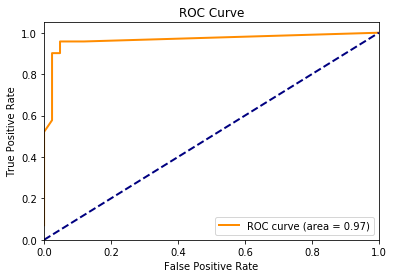

[[39  3]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 50 e max_depth = 7 e learning_rate = 0.05
Recall = 0.9356025039123631
Acurácias = 0.9315582916506349
Precisions = 0.9549049898866186
F1 - score = 0.9449430820598703


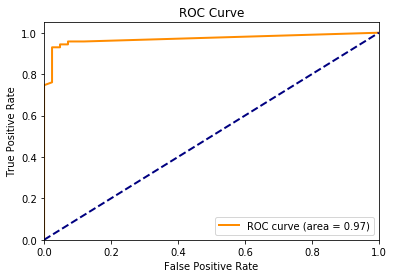

[[38  4]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 3 e learning_rate = 0.05
Recall = 0.9719874804381847
Acurácias = 0.9544132358599461
Precisions = 0.9565411521361179
F1 - score = 0.964029890879206


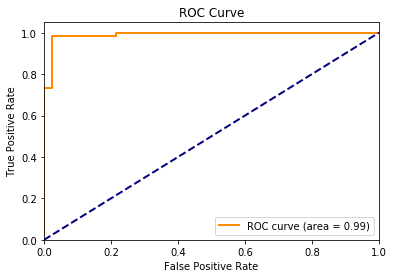

[[41  1]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 5 e learning_rate = 0.05
Recall = 0.9524256651017214
Acurácias = 0.9403462870334744
Precisions = 0.9526377418447229
F1 - score = 0.9524385435132107


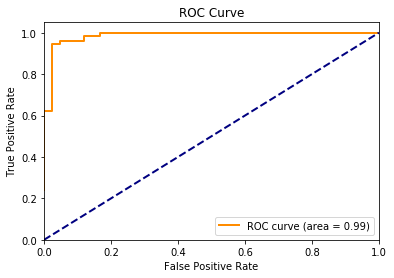

[[39  3]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 7 e learning_rate = 0.05
Recall = 0.9271517996870109
Acurácias = 0.9244786456329358
Precisions = 0.951632940841723
F1 - score = 0.9390454643124656


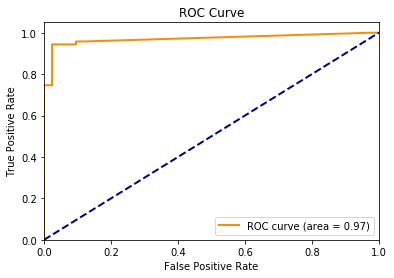

[[38  4]
 [ 4 67]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 3 e learning_rate = 0.05
Recall = 0.9720266040688577
Acurácias = 0.9544440169295882
Precisions = 0.9564701907637867
F1 - score = 0.9640124533227981


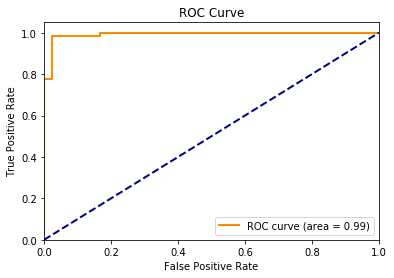

[[41  1]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 5 e learning_rate = 0.05
Recall = 0.9524256651017214
Acurácias = 0.9438553289726818
Precisions = 0.9578539731539925
F1 - score = 0.9551023355861481


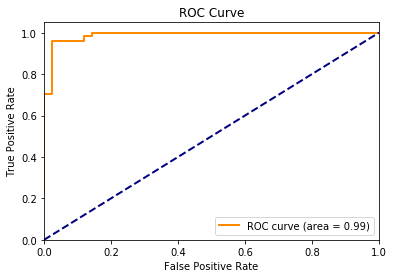

[[40  2]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 7 e learning_rate = 0.05
Recall = 0.9327464788732394
Acurácias = 0.9315275105809928
Precisions = 0.957460553126588
F1 - score = 0.9447367855592514


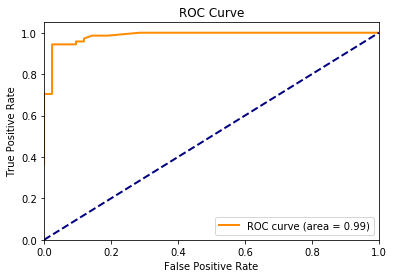

[[39  3]
 [ 4 67]]
--------------------------------------------------------
N_estimators = 50 e max_depth = 3 e learning_rate = 0.01
Recall = 0.9748043818466353
Acurácias = 0.9421469796075413
Precisions = 0.936433933933934
F1 - score = 0.9549620533358694


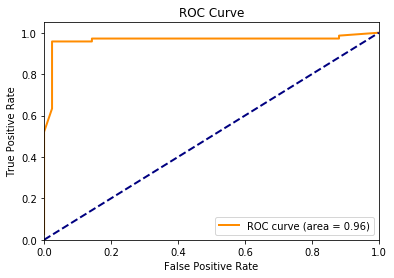

[[38  4]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 50 e max_depth = 5 e learning_rate = 0.01
Recall = 0.9523865414710485
Acurácias = 0.9261869949980761
Precisions = 0.9316948232695058
F1 - score = 0.9418115668115667


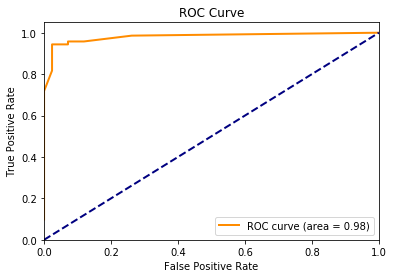

[[37  5]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 50 e max_depth = 7 e learning_rate = 0.01
Recall = 0.9411971830985916
Acurácias = 0.9209388226240861
Precisions = 0.9336555562756604
F1 - score = 0.9373280028045402


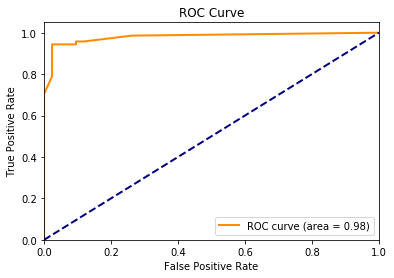

[[38  4]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 3 e learning_rate = 0.01
Recall = 0.9775821596244132
Acurácias = 0.9527048864948057
Precisions = 0.949550472254306
F1 - score = 0.9630374520374521


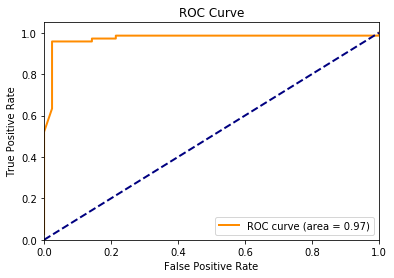

[[41  1]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 5 e learning_rate = 0.01
Recall = 0.94679186228482
Acurácias = 0.9297268180069258
Precisions = 0.9416474522812551
F1 - score = 0.9441469829111917


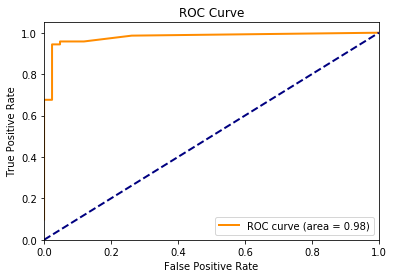

[[38  4]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 100 e max_depth = 7 e learning_rate = 0.01
Recall = 0.9384194053208137
Acurácias = 0.9262485571373607
Precisions = 0.9439290331360141
F1 - score = 0.9411169503423025


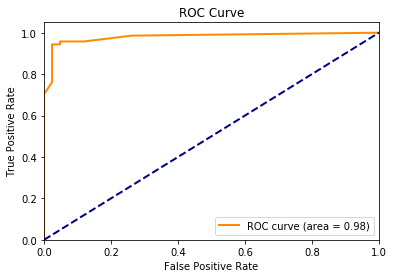

[[39  3]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 3 e learning_rate = 0.01
Recall = 0.9748043818466353
Acurácias = 0.9492266256252405
Precisions = 0.9470354993302724
F1 - score = 0.9603495017544214


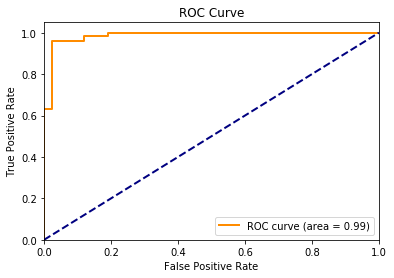

[[41  1]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 5 e learning_rate = 0.01
Recall = 0.9524256651017214
Acurácias = 0.936806464024625
Precisions = 0.9472030078368107
F1 - score = 0.9497413885055972


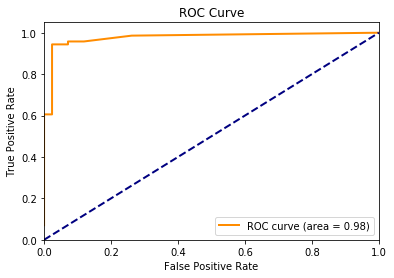

[[38  4]
 [ 3 68]]
--------------------------------------------------------
N_estimators = 200 e max_depth = 7 e learning_rate = 0.01
Recall = 0.9384194053208137
Acurácias = 0.9333282031550597
Precisions = 0.9547133468615042
F1 - score = 0.9464296232808745


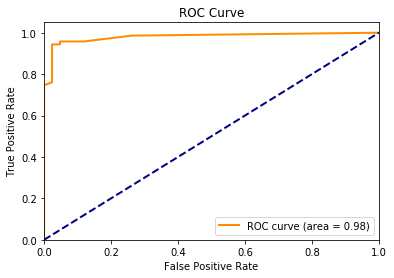

[[39  3]
 [ 3 68]]
--------------------------------------------------------


In [64]:
learning_rate = 0.1
for i in range(3):
    if(i == 1):
        learning_rate = 0.05
    elif i==2:
        learning_rate = 0.01
        
    n_estimators = 50
    while n_estimators <= 200:
        
        max_depth = 3
        while max_depth <= 7:
            model_GBC = GradientBoostingClassifier(learning_rate=learning_rate,max_depth=max_depth,n_estimators=n_estimators)
            
            recalls = np.empty((1,0),dtype = float)
            acuracias = np.empty((1,0),dtype = float)
            precisions = np.empty((1,0),dtype = float)
            f1s = np.empty((1,0),dtype = float)
            
            for train_index,test_index in kfold.split(X,y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                model_GBC.fit(X_train, y_train)
                ŷ = model_GBC.predict(X_test)
                
                acuracia = metrics.accuracy_score(y_test, ŷ)
                precision = metrics.precision_score(y_test, ŷ)
                recall = metrics.recall_score(y_test,  ŷ)
                f1 = metrics.f1_score(y_test,  ŷ)
                
                recalls = np.append(recalls,recall)
                acuracias = np.append(acuracias,acuracia)
                precisions = np.append(precisions,precision)
                f1s = np.append(f1s,f1)
            print("N_estimators = {}".format(n_estimators) + " e max_depth = {}".format(max_depth) + " e learning_rate = {}".format(learning_rate)) 
            
            print("Recall = {}".format(np.mean(recalls)))
            print("Acurácias = {}".format(np.mean(acuracias)))
            print("Precisions = {}".format(np.mean(precisions)))
            print("F1 - score = {}".format(np.mean(f1s)))
            
            gerar_curva_roc(y_test, X_test, model_GBC)
            
            print(metrics.confusion_matrix(y_test, ŷ, labels=np.unique(y_test)))

            print("--------------------------------------------------------")
            max_depth = max_depth + 2
        n_estimators = n_estimators*2